In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import time

import Bell_EBM as ebm

In [2]:
planet = ebm.Planet('bell2018', rad=1.900*const.R_jup.value, mass=1.470*const.M_jup.value,
                    Porb=1.09142030, a=0.02340*const.au.value, inc=83.37, vWind=5e3)

star = ebm.Star(teff=6300., rad=1.59, mass=1.20)

system = ebm.System(star, planet)

In [3]:
# Base line map generator
bUpdates = 100. #Amount of timesteps in baseline
bOrbits = 40. #Amount of orbits in baseline
#Total updates = bUpdates*bOrbits

Teq = system.get_teq()
T0 = np.ones_like(system.planet.map.values)*Teq
t0 = 0.
t1 = t0+system.planet.Porb*bOrbits
dt = system.planet.Porb/bUpdates
baselineMaps, ttc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
t = np.linspace(0, planet.Prot, 1000)
baselineLightcurve = system.lightcurve(t)

In [4]:
tStart = time.time()

# ---Variables---
nTests = 10 #Number of intervals ex: 1, 2, 3 orbits is 3 intervals
nloop = 5 #Number of times the calculations are to be redone for avg
nStep = 1 #Step number ex: 2, 4, 6 orbits is 2 step number
nUpdates = 100. #Total number of updates per orbit

dataArray = np.zeros(shape=(5,nTests))

for j in range(0, nTests):
    nOrbits = (nStep*(j+1))
    rTotal = 0.
    lcTotal = np.zeros_like(baselineLightcurve)
    
    for i in range(0, nloop):
        #Set up the system
        planet = ebm.Planet('bell2018', rad=1.900*const.R_jup.value, mass=1.470*const.M_jup.value,
                    Porb=1.09142030, a=0.02340*const.au.value, inc=83.37, vWind=5e3)
        star = ebm.Star(teff=6300., rad=1.59, mass=1.20)
        system = ebm.System(star, planet)
        #Run the model
        Teq = system.get_teq()
        T0 = np.ones_like(system.planet.map.values)*Teq
        t0 = 0.
        t1 = t0+system.planet.Porb*nOrbits
        dt = system.planet.Porb/(nUpdates)
        testMaps, ttc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
        #Process data from the model       
        rTotal = rTotal + float(ttc)
        
        t = np.linspace(0, planet.Prot, 1000)
        lcTotal = lcTotal + (system.lightcurve(t)) #removed np.absolute()
               
    ttcavg = rTotal/nloop
    lcTotalavg = lcTotal/nloop
    
    dataArray[0,j] = ttcavg #Time to Compute
    dataArray[1,j] = (nOrbits) #Number of orbits
    #dataArray[2,j] = (np.mean(np.absolute(baselineMaps-eTotalavg))) #Mean error on heat
    #dataArray[3,j] = (np.amax(np.absolute(baselineMaps-eTotalavg))) #Maximum error on heat
    dataArray[4,j] = (np.mean(np.absolute(baselineLightcurve-lcTotalavg))) #Mean error on lightcurve
    
    #print('Accuracy lost at ' + str(nOrbits) + ' updates:' + str(np.mean(np.absolute(baselineMaps-eTotalavg))))
    #print('Max accuracy lost at ' + str(nOrbits) + ' updates:' + str(eMax))
    print('Avergae time to compute at ' + str(nOrbits) + ' orbits: ' + str(dataArray[0,j]))
    print('Accuracy lost (LC) at ' + str(nOrbits) + ' orbits:' + str(dataArray[4,j]))
    print('----------')
    
tEnd = time.time()    
tTotal = tEnd - tStart

print('Total computational time: ' + str(tTotal/60) + ' minutes')

Avergae time to compute at 1 orbits: 0.05053544044494629
Accuracy lost (LC) at 1 orbits:1.4847587457949183e-06
----------
Avergae time to compute at 2 orbits: 0.14028644561767578
Accuracy lost (LC) at 2 orbits:3.219420380819407e-08
----------
Avergae time to compute at 3 orbits: 0.16127662658691405
Accuracy lost (LC) at 3 orbits:3.421763548463192e-10
----------
Avergae time to compute at 4 orbits: 0.18612518310546874
Accuracy lost (LC) at 4 orbits:7.134768766393104e-12
----------
Avergae time to compute at 5 orbits: 0.23465805053710936
Accuracy lost (LC) at 5 orbits:1.035342071001007e-13
----------
Avergae time to compute at 6 orbits: 0.2858710765838623
Accuracy lost (LC) at 6 orbits:1.780505301844041e-15
----------
Avergae time to compute at 7 orbits: 0.34202961921691893
Accuracy lost (LC) at 7 orbits:2.7515648451121448e-17
----------
Avergae time to compute at 8 orbits: 0.382796049118042
Accuracy lost (LC) at 8 orbits:8.003444912016433e-20
----------
Avergae time to compute at 9 orbi

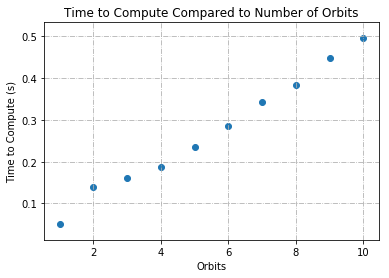

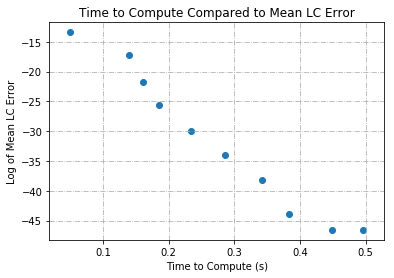

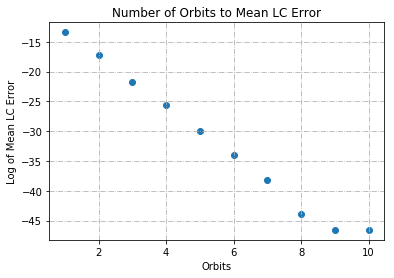

In [5]:
y = dataArray[0,:]
x = dataArray[1,:]
plt.scatter(x, y)
plt.xlabel("Orbits")
plt.ylabel("Time to Compute (s)")
plt.title('Time to Compute Compared to Number of Orbits')
plt.grid(True, linestyle='-.')
plt.show()

useLog = True
x = dataArray[0,:]
if useLog == True:
    y = np.log(dataArray[4,:])
    plt.ylabel("Log of Mean LC Error")
else:
    y = dataArray[4,:]
    plt.ylabel("Mean LC Error")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    lim = (np.amax(dataArray[4,:]))*1.2
    plt.ylim(bottom=0, top = lim) 
plt.scatter(x, y)
plt.xlabel("Time to Compute (s)")
plt.title('Time to Compute Compared to Mean LC Error')
plt.grid(True, linestyle='-.')
plt.show()

useLog = True
x = dataArray[1,:]
if useLog == True:
    y = np.log(dataArray[4,:])
    plt.ylabel("Log of Mean LC Error")
else:
    y = dataArray[4,:]
    plt.ylabel("Mean LC Error")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    lim = (np.amax(dataArray[4,:]))*1.2
    plt.ylim(bottom=0, top = lim) 
plt.scatter(x, y)
plt.xlabel("Orbits")
plt.title('Number of Orbits to Mean LC Error')
plt.grid(True, linestyle='-.')
plt.show()

In [6]:
baselineLightcurve.size

1000

In [54]:
eTotalavg.size

128

In [53]:
baselineMaps.size

128

In [52]:
baselineMaps-eTotalavg

array([[   75.10255684,   101.817807  ,   125.27651992,   137.74460991,
          137.74460991,   125.27651992,   101.817807  ,    75.10255684,
          -89.14278824,  -335.9009893 ,  -507.36362738,  -594.54642404,
         -594.54642404,  -507.36362738,  -335.9009893 ,   -89.14278824,
         -595.79022339, -1278.31261531, -1468.90730938, -1535.32807177,
        -1535.32807177, -1468.90730938, -1278.31261531,  -595.79022339,
         -853.88109062, -1027.66406232,  -947.56469671,  -904.86209808,
         -904.86209808,  -947.56469671, -1027.66406232,  -853.88109062,
         -562.49857937,  -409.27659604,  -427.35628778,  -451.17565013,
         -451.17565013,  -427.35628778,  -409.27659604,  -562.49857937,
         -219.01113118,  -216.28277675,  -263.19160187,  -294.0669894 ,
         -294.0669894 ,  -263.19160187,  -216.28277675,  -219.01113118,
          -22.65090718,   -78.23843803,  -114.35207132,  -132.74563976,
         -132.74563976,  -114.35207132,   -78.23843803,   -22.65